<a href="https://colab.research.google.com/github/ParsaFotowat/ML_Projects/blob/main/Cat_VS_Dogs_(Classificatoin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

install: missing destination file operand after 'kaggle'
Try 'install --help' for more information.


In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

... resuming from 920649728 bytes (222241966 bytes left) ...
100% 1.06G/1.06G [00:01<00:00, 167MB/s]
100% 1.06G/1.06G [00:01<00:00, 120MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
train_data = keras.utils.image_dataset_from_directory(directory='/content/train',labels="inferred",label_mode="int",
                                                      batch_size=32 , image_size=(256,256))

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
## normalize

def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label


train_data = train_data.map(process)
validation_ds = validation_ds.map(process)

In [13]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_data,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 107ms/step - loss: 1.2461 - accuracy: 0.6322 - val_loss: 0.5504 - val_accuracy: 0.7422
Epoch 2/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5301 - accuracy: 0.7435 - val_loss: 0.5348 - val_accuracy: 0.7382
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4565 - accuracy: 0.7862 - val_loss: 0.6041 - val_accuracy: 0.7286
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3973 - accuracy: 0.8209 - val_loss: 0.4968 - val_accuracy: 0.7862
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3253 - accuracy: 0.8609 - val_loss: 0.6320 - val_accuracy: 0.7910
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2508 - accuracy: 0.8954 - val_loss: 0.6781 - val_accuracy: 0.7852
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.1922 - accuracy: 0.9246 - val_loss: 0.9340 - val_ac

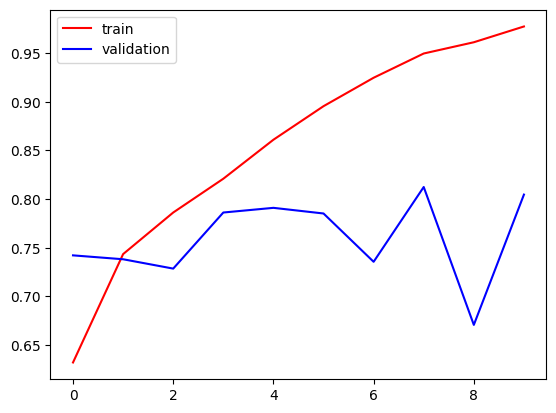

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

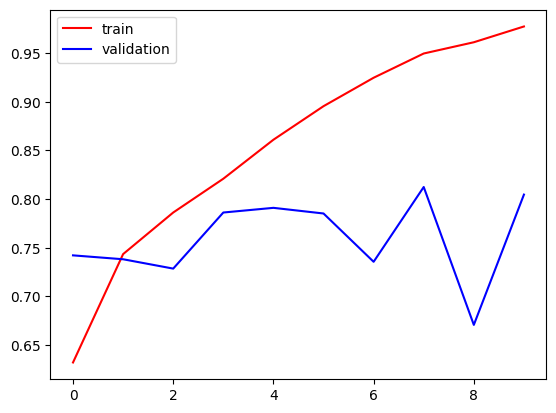

In [19]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

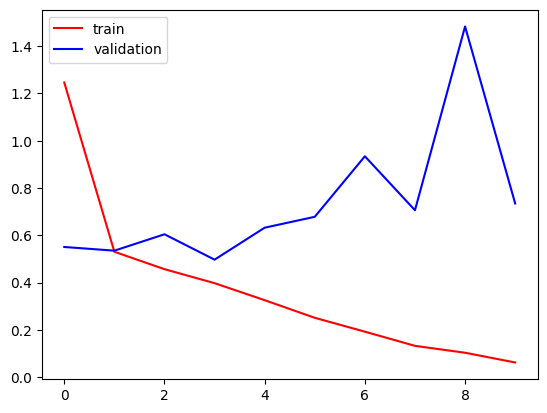

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

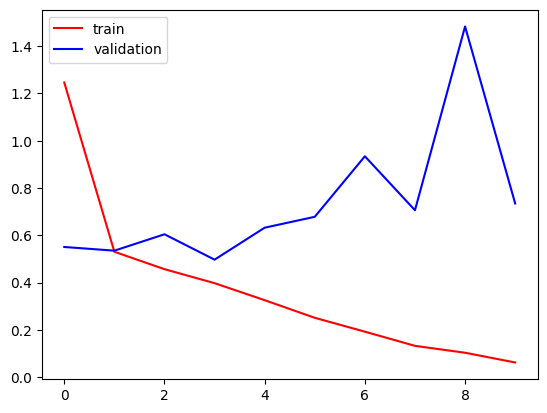

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

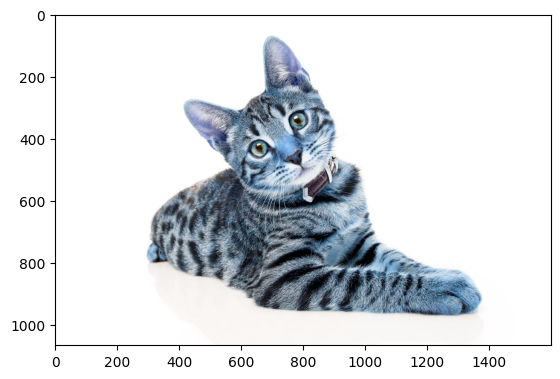

In [23]:
import cv2
test_img= cv2.imread("/content/test.jpg")
plt.imshow(test_img)

In [24]:
test_img.shape

(1067, 1600, 3)

In [25]:
test_img = cv2.resize(test_img,(256,256))

In [26]:
test_input = test_img.reshape((1,256,256,3))

In [27]:
model.predict(test_input)

1/1 [==============================] - 1s 520ms/step


array([[3.706151e-11]], dtype=float32)